In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

# **Display the Pixels**

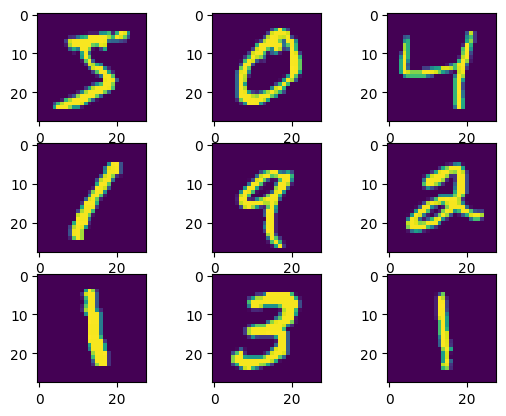

In [5]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1


## **Flatten and Normalize the pixels**

In [6]:
X_train = X_train.reshape(X_train.shape[0],28*28);
X_test = X_test.reshape(X_test.shape[0],28*28);

X_train = X_train/255
X_test = X_test/255

# **Training using KNN algorithm**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of KNNClassifier:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  13   12  982    2    1    0    2   17    3    0]
 [   0    3    3  976    1   10    1    7    6    3]
 [   2   11    0    0  940   

# **MNIST using Random Forest Classifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of RandomForestClassifier:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 968    1    0    0    0    4    4    1    2    0]
 [   0 1122    4    2    0    3    2    1    1    0]
 [   6    0  999    5    2    1    4   10    5    0]
 [   1    0   10  965    0    9    1   11   10    3]
 [   1    0    1    0  952   

# **Classification using ANN**

In [11]:

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
X_train = X_train.reshape([X_train.shape[0],28,28])
X_test = X_test.reshape([X_test.shape[0],28,28])
X_train.shape,X_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [15]:
history = model.fit(X_train,y_train,batch_size=100,epochs=25,verbose=1,validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 6s 4ms/step - loss: 0.3689 - accuracy: 0.8963 - val_loss: 0.2009 - val_accuracy: 0.9428
Epoch 2/25
480/480 [==============================] - 2s 3ms/step - loss: 0.1559 - accuracy: 0.9540 - val_loss: 0.1404 - val_accuracy: 0.9603
Epoch 3/25
480/480 [==============================] - 2s 3ms/step - loss: 0.1115 - accuracy: 0.9670 - val_loss: 0.1091 - val_accuracy: 0.9697
Epoch 4/25
480/480 [==============================] - 2s 3ms/step - loss: 0.0832 - accuracy: 0.9754 - val_loss: 0.1081 - val_accuracy: 0.9677
Epoch 5/25
480/480 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9800 - val_loss: 0.1017 - val_accuracy: 0.9711
Epoch 6/25
480/480 [==============================] - 2s 4ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9703
Epoch 7/25
480/480 [==============================] - 2s 4ms/step - loss: 0.0453 - accuracy: 0.9868 - val_loss: 0.0899 - val_accuracy: 0.9734
Epoch 

In [16]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

313/313 [==============================] - 1s 3ms/step


In [17]:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of ANN:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 966    0    0    1    1    2    3    1    2    4]
 [   0 1122    4    3    0    1    2    1    2    0]
 [   1    3 1011    2    4    0    2    7    1    1]
 [   0    0    3  985    1    6    0    3    1   11]
 [   2    1    5    1  951   

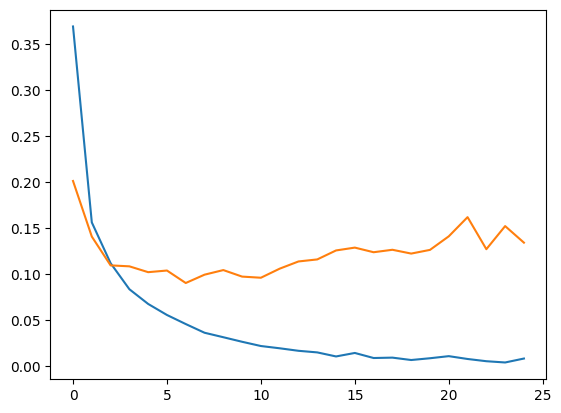

In [18]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

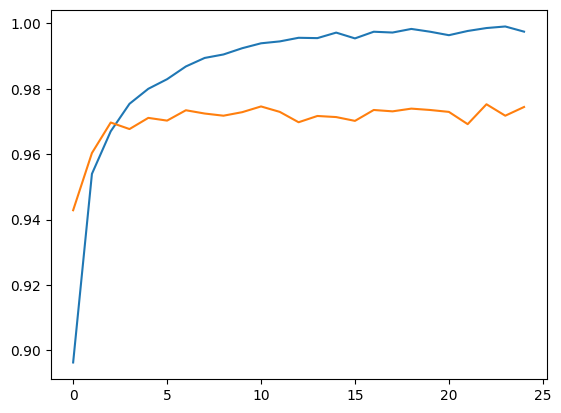

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
model=Sequential()


model.add(Conv2D(filters=64, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)      

In [22]:
history = model.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 43s 81ms/step - loss: 0.4429 - accuracy: 0.9003 - val_loss: 1.4178 - val_accuracy: 0.7293
Epoch 2/100
375/375 [==============================] - 31s 83ms/step - loss: 0.1716 - accuracy: 0.9617 - val_loss: 0.1008 - val_accuracy: 0.9819
Epoch 3/100
375/375 [==============================] - 31s 82ms/step - loss: 0.1110 - accuracy: 0.9739 - val_loss: 0.0886 - val_accuracy: 0.9791
Epoch 4/100
375/375 [==============================] - 29s 78ms/step - loss: 0.0844 - accuracy: 0.9793 - val_loss: 0.1127 - val_accuracy: 0.9710
Epoch 5/100
375/375 [==============================] - 31s 83ms/step - loss: 0.0755 - accuracy: 0.9819 - val_loss: 0.0534 - val_accuracy: 0.9862
Epoch 6/100
375/375 [==============================] - 30s 79ms/step - loss: 0.0598 - accuracy: 0.9848 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 7/100
375/375 [==============================] - 30s 79ms/step - loss: 0.0527 - accuracy: 0.9861 - val_loss: 0.0549 - val_ac

In [26]:

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

313/313 [==============================] - 2s 6ms/step


In [27]:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of CNN:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 975    1    0    0    0    0    3    1    0    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    1    1 1004    0    2    0    1    1    0]
 [   0    1    0    0  976   

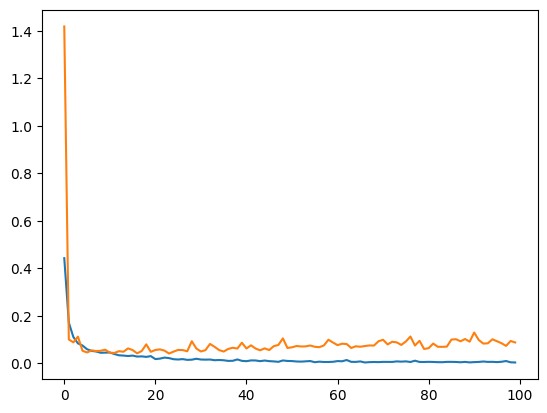

In [28]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

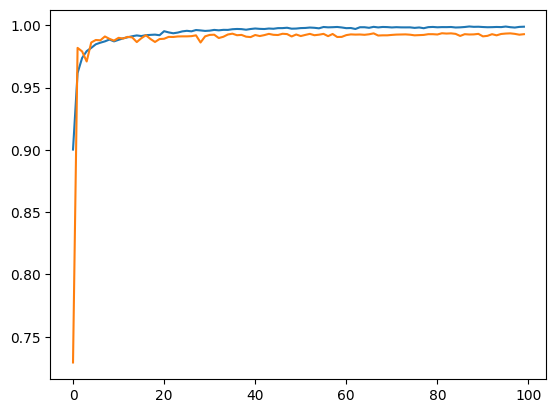

In [29]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

(91.65, 100.31)

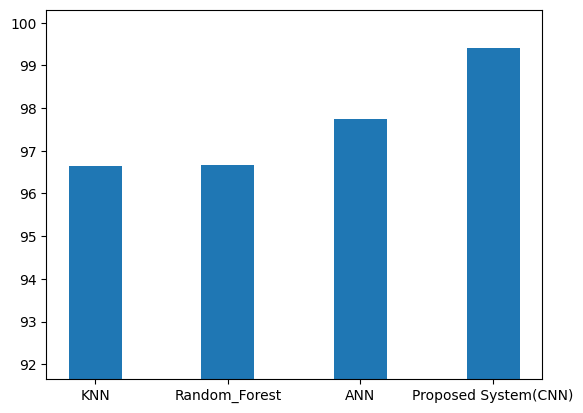

In [30]:
data = {'KNN':96.65,'Random_Forest':96.67,'ANN':97.74,'Proposed System(CNN)':99.41}
plt.bar(data.keys(),data.values(),width=0.4)
max_y_lim = max(data.values()) + .9
min_y_lim = min(data.values())-5
plt.ylim(min_y_lim, max_y_lim)

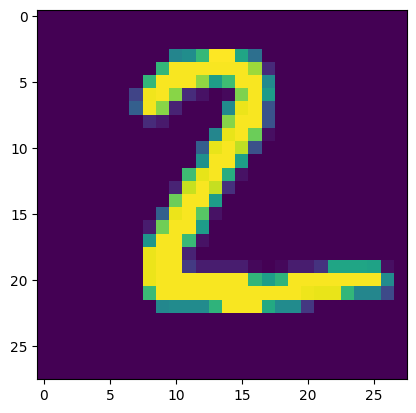

In [31]:
plt.imshow(X_test[1])

In [32]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 487ms/step


array([2])